<a href="https://colab.research.google.com/github/ShadowMonarch001/ML/blob/main/Decision%20Tree/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Breast_cancer_data.csv")

In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
print(df.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [ ]:
df_features = df.iloc[:,:-1]
df_target = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25,random_state = 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_test = classifier.predict(x_test)

In [ ]:
from sklearn import metrics

score = metrics.accuracy_score(y_pred_test,y_test)
print(score)

0.9020979020979021


In [ ]:
from sklearn import metrics

c_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)

print(c_matrix_test)

[[50  6]
 [ 8 79]]


In [ ]:
test_acc_li=[]
for i in range(1,21):
  classifier_plot = DecisionTreeClassifier(max_depth=i)
  classifier_plot.fit(x_train,y_train)
  y_pred_test_plot = classifier_plot.predict(x_test)
  test_score_plot = metrics.accuracy_score(y_pred_test_plot,y_test)
  test_acc_li.append(test_score_plot)
print(test_acc_li)

[0.8811188811188811, 0.8811188811188811, 0.8951048951048951, 0.8951048951048951, 0.9090909090909091, 0.9090909090909091, 0.9230769230769231, 0.8951048951048951, 0.8951048951048951, 0.8881118881118881, 0.8951048951048951, 0.9090909090909091, 0.8741258741258742, 0.8811188811188811, 0.8881118881118881, 0.9020979020979021, 0.9020979020979021, 0.8881118881118881, 0.9020979020979021, 0.8881118881118881]


In [ ]:
train_acc_li=[]
for i in range(1,21):
  classifier_plot = DecisionTreeClassifier(max_depth=i)
  classifier_plot.fit(x_train,y_train)
  y_pred_train_plot = classifier_plot.predict(x_train)
  train_score_plot = metrics.accuracy_score(y_pred_train_plot,y_train)
  train_acc_li.append(train_score_plot)
print(train_acc_li)

[0.892018779342723, 0.892018779342723, 0.9178403755868545, 0.9553990610328639, 0.9671361502347418, 0.9812206572769953, 0.9906103286384976, 0.9976525821596244, 0.9976525821596244, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


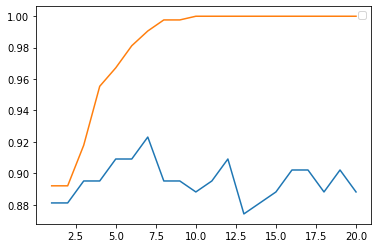

In [ ]:
import numpy as np

x = np.arange(1, 21)

plt.plot(x,test_acc_li)
plt.plot(x,train_acc_li)
plt.legend()

plt.show()

In [ ]:
n=int(input("Enter max depth value:"))

Enter max depth value:4


In [ ]:
clf=DecisionTreeClassifier(max_depth=n,random_state=0)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
y_train_pred=clf.predict(x_train)

In [ ]:
y_test_pred=clf.predict(x_test)

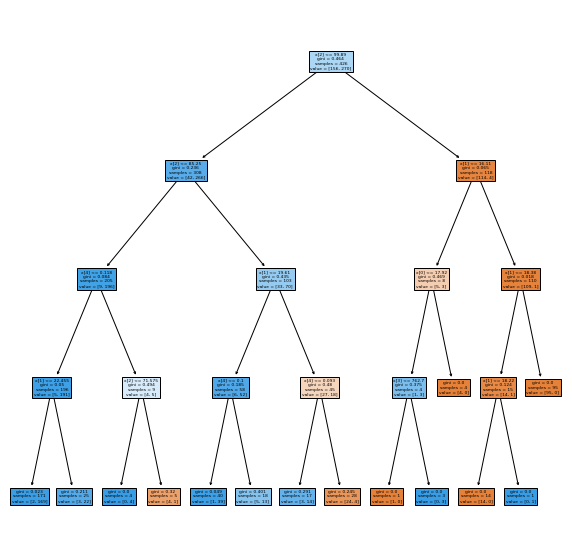

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf,filled=True)

In [ ]:
from sklearn import metrics
print(f"training score = {metrics.accuracy_score(y_train,y_train_pred)}")

training score = 0.9553990610328639


In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train,y_train_pred,labels=clf.classes_)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[142  14]
 [  5 265]]


In [ ]:
print(f"testing score = {metrics.accuracy_score(y_test,y_test_pred)}")

testing score = 0.8951048951048951
